In [3]:
library(tidyverse)
library(magrittr)
library(reshape2)
library(ggplot2)
library(scales)
library(ggrepel)
library(readxl)
library(corrplot)
library(purrr)
library(rlang)
library(svglite)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths


Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor

corrplot 0.84 loaded

Attaching package: 'rlang'

The following object is masked from 'package:magrittr':

    set_names

The following objects are masked from 'package

In [ ]:
my_theme <- function(base_size = 12, base_family = "sans"){
 theme_grey(base_size = base_size, base_family = base_family) +
   theme(
     axis.text = element_text(size = 12),
     axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
     axis.ticks.length = unit(.25, "cm"),
     axis.title = element_text(size = 14),
     panel.grid.major = element_line(color = "grey"),
     panel.grid.minor = element_blank(),
     panel.background = element_rect(fill = "aliceblue"), # alice blue could be replaced with NA as well,
     panel.border = element_rect(linetype = "solid", fill = NA),
     strip.background = element_rect(fill = "lightgrey", color = "grey", size = 1),
     strip.text = element_text(face = "bold", size = 12, color = "navy"),
     legend.position = "right",
     legend.background = element_blank(),
     legend.title = element_text(face = "bold"),
     panel.spacing  = unit(.5, "lines")
     #panel.border = element_rect(color = "grey", fill = NA, size = 0.5)
   )
}

In [18]:
input_path <- "D:/OneDrive - UTS/36103/AT2B/data2"
char_ouput_path <- "D:/OneDrive - UTS/36103/AT2B/charts"

In [19]:
col_def <- cols(
  LGA = readr::col_factor(),
  crime_tot_per_lga = readr::col_double(),
  crime_rate_per_lga = readr::col_double(),
  Sex = readr::col_factor(),
  Age = readr::col_factor(),
  pop = readr::col_double(),
  pop_total = readr::col_double(),
  birthplace_of_person = readr::col_factor(),
  birth_value = readr::col_double(),
  `Industry of Employment` = readr::col_factor(),
  emp_value = readr::col_double(),
  `Labour force status` = readr::col_factor(),
  labour_value = readr::col_double(),
  Pop_Dens_km2 = readr::col_double(),
  seifa_value = readr::col_double(),
  num_service = readr::col_integer()
)

In [20]:
data <- readr::read_csv(paste(input_path, "unified3.csv", sep = "/"), col_types = col_def)

head(data)
glimpse(data)

LGA,crime_tot_per_lga,crime_rate_per_lga,Sex,Age,pop,pop_total,birthplace_of_person,birth_value,Industry of Employment,emp_value,Labour force status,labour_value,Pop_Dens_km2,seifa_value,num_service
albury,6233,0.1220219,Females,95 - 99,78,51081,New Zealand,2510,NA,NA,NA,NA,170.5,964,1769
albury,6233,0.1220219,Females,95 - 99,78,51081,Papua New Guinea,99,NA,NA,NA,NA,170.5,964,1769
albury,6233,0.1220219,Females,95 - 99,78,51081,Fiji,218,NA,NA,NA,NA,170.5,964,1769
albury,6233,0.1220219,Females,95 - 99,78,51081,Tonga,24,NA,NA,NA,NA,170.5,964,1769
albury,6233,0.1220219,Females,95 - 99,78,51081,England,4254,NA,NA,NA,NA,170.5,964,1769
albury,6233,0.1220219,Females,95 - 99,78,51081,Northern Ireland,64,NA,NA,NA,NA,170.5,964,1769


Observations: 5,485,565
Variables: 16
$ LGA                      <fct> albury, albury, albury, albury, albury, al...
$ crime_tot_per_lga        <dbl> 6233, 6233, 6233, 6233, 6233, 6233, 6233, ...
$ crime_rate_per_lga       <dbl> 0.1220219, 0.1220219, 0.1220219, 0.1220219...
$ Sex                      <fct> Females, Females, Females, Females, Female...
$ Age                      <fct> 95 - 99, 95 - 99, 95 - 99, 95 - 99, 95 - 9...
$ pop                      <dbl> 78, 78, 78, 78, 78, 78, 78, 78, 78, 78, 78...
$ pop_total                <dbl> 51081, 51081, 51081, 51081, 51081, 51081, ...
$ birthplace_of_person     <fct> "New Zealand", "Papua New Guinea", "Fiji",...
$ birth_value              <dbl> 2510, 99, 218, 24, 4254, 64, 800, 213, 325...
$ `Industry of Employment` <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ emp_value                <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ `Labour force status`    <fct> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA...
$ labour_value

# Scatter Plots

In [21]:
data_scatter <- data %>% 
    group_by(LGA) %>%
    summarise(crime_rate_per_lga = mean(crime_rate_per_lga), 
              Pop_Dens_km2 = mean(Pop_Dens_km2), 
              seifa_value = mean(seifa_value),
              num_service = mean(num_service),
              pop_total = mean(pop_total)) %>%
    drop_na

glimpse(data_scatter)

Observations: 105
Variables: 6
$ LGA                <fct> albury, ballina, balranald, bathurst regional, b...
$ crime_rate_per_lga <dbl> 0.12202189, 0.06439412, 0.08376963, 0.09751314, ...
$ Pop_Dens_km2       <dbl> 170.5, 88.7, 0.1, 11.1, 5.4, 8.1, 4.2, 1449.8, 0...
$ seifa_value        <dbl> 964, 986, 969, 994, 974, 957, 965, 995, 997, 100...
$ num_service        <dbl> 1769, 1353, 4, 2882, 771, 422, 10, 248915, 8, 28...
$ pop_total          <dbl> 51081, 41774, 2292, 41297, 33229, 12656, 8456, 3...


## `crime_rate_per_lga` vs `Pop_Dens_km2`

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


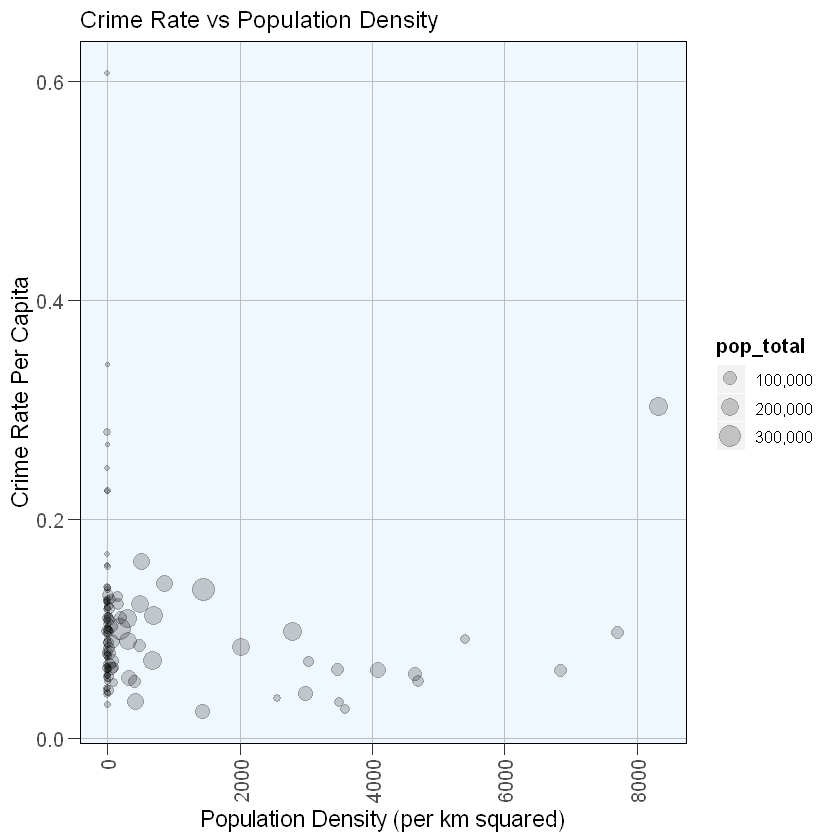

In [46]:
type = "scatter"
x_var = "Pop_Dens_km2"
y_var = "crime_rate_per_lga"

ggplot(data_scatter, aes(!!sym(x_var), !!sym(y_var), size = pop_total)) +
    geom_point(alpha = 0.2) + 
    scale_size_continuous(labels = scales::comma) +
    ylab("Crime Rate Per Capita") +
    xlab("Population Density (per km squared)") +
    ggtitle("Crime Rate vs Population Density") +
    my_theme()

chart_name_svg = paste("scatter_", y_var, "_vs_", x_var, ".svg", sep = "")
chart_name_png = paste("scatter_", y_var, "_vs_", x_var, ".png", sep = "")
filename_svg = paste(char_ouput_path, chart_name_svg, sep = "/")
filename_png = paste(char_ouput_path, chart_name_png, sep = "/")
ggsave(file = filename_svg)
ggsave(file = filename_png)

## `crime_rate_per_lga` vs `seifa_value`

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


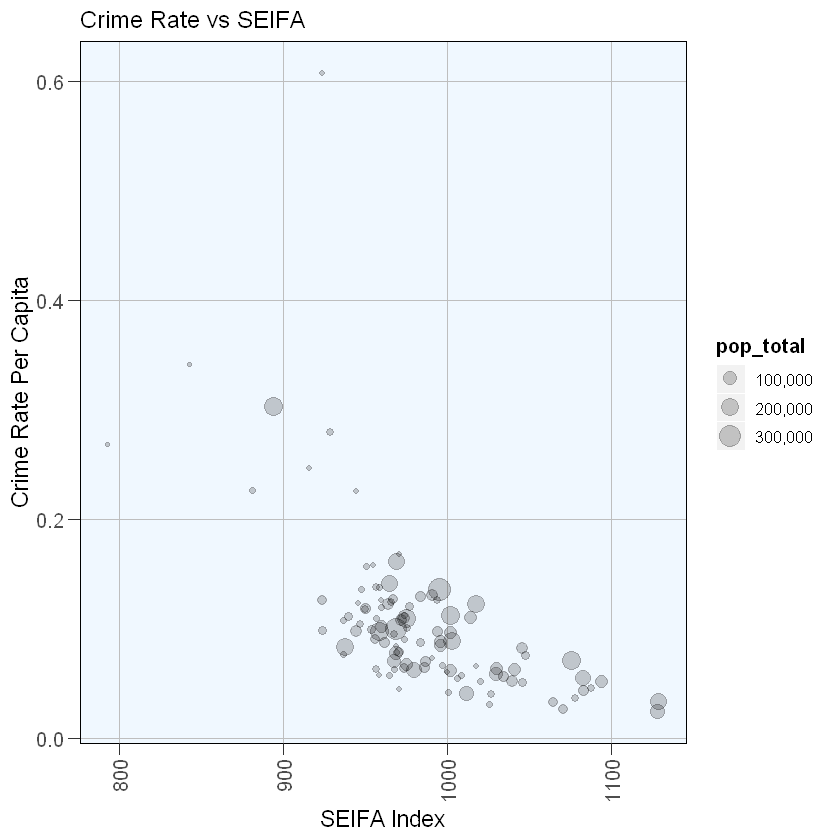

In [47]:
x_var = "seifa_value"
y_var = "crime_rate_per_lga"

ggplot(data_scatter, aes(!!sym(x_var), !!sym(y_var), size = pop_total)) +
    geom_point(alpha = 0.2) +
    scale_size_continuous(labels = scales::comma) +
    xlab("SEIFA Index") +
    ylab("Crime Rate Per Capita") + 
    ggtitle("Crime Rate vs SEIFA") +
    my_theme()

chart_name_svg = paste("scatter_", y_var, "_vs_", x_var, ".svg", sep = "")
chart_name_png = paste("scatter_", y_var, "_vs_", x_var, ".png", sep = "")
filename_svg = paste(char_ouput_path, chart_name_svg, sep = "/")
filename_png = paste(char_ouput_path, chart_name_png, sep = "/")
ggsave(file = filename_svg)
ggsave(file = filename_png)

## `crime_rate_per_lga` vs `num_service`

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


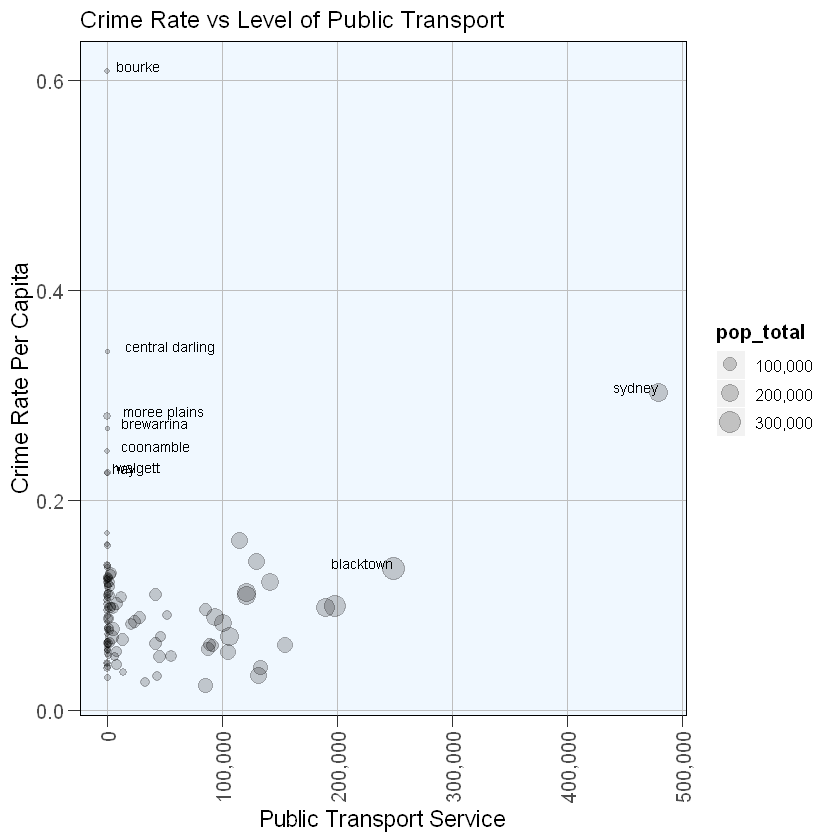

In [48]:
x_var = "num_service"
y_var = "crime_rate_per_lga"
title = "Crime Rate vs Level of Public Transport"

ggplot(data_scatter, aes(!!sym(x_var), !!sym(y_var), size = pop_total)) +
    geom_point(alpha = 0.2) +
    scale_size_continuous(labels = scales::comma) +
    scale_x_continuous(labels = scales::comma) +
    xlab("Public Transport Service") +
    ylab("Crime Rate Per Capita") +
    # label some points over a certain threshold
    geom_text(aes(label = ifelse(!!sym(x_var) > 200000, as.character(LGA), '')), hjust = 1, vjust = 0, size = 3) +
    geom_text(aes(label = ifelse((!!sym(y_var) > 0.2) & (!!sym(x_var) < 200000), as.character(LGA), '')), hjust = -0.2, vjust = 0, size = 3) +
    ggtitle(title) +
    my_theme()

chart_name_svg = paste("scatter_", y_var, "_vs_", x_var, ".svg", sep = "")
chart_name_png = paste("scatter_", y_var, "_vs_", x_var, ".png", sep = "")
filename_svg = paste(char_ouput_path, chart_name_svg, sep = "/")
filename_png = paste(char_ouput_path, chart_name_png, sep = "/")
ggsave(file = filename_svg)
ggsave(file = filename_png)

## `crime_rate_per_lga` vs `num_service` Per Capita

In [25]:
head(data_scatter)

LGA,crime_rate_per_lga,Pop_Dens_km2,seifa_value,num_service,pop_total
albury,0.12202189,170.5,964,1769,51081
ballina,0.06439412,88.7,986,1353,41774
balranald,0.08376963,0.1,969,4,2292
bathurst regional,0.09751314,11.1,994,2882,41297
bega valley,0.06376960,5.4,974,771,33229
bellingen,0.06305310,8.1,957,422,12656


In [26]:
data_scatter %<>%
    mutate(service_per_capita = num_service / pop_total)

head(data_scatter)

LGA,crime_rate_per_lga,Pop_Dens_km2,seifa_value,num_service,pop_total,service_per_capita
albury,0.12202189,170.5,964,1769,51081,0.034631272
ballina,0.06439412,88.7,986,1353,41774,0.032388567
balranald,0.08376963,0.1,969,4,2292,0.001745201
bathurst regional,0.09751314,11.1,994,2882,41297,0.069787152
bega valley,0.06376960,5.4,974,771,33229,0.023202624
bellingen,0.06305310,8.1,957,422,12656,0.033343869


Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


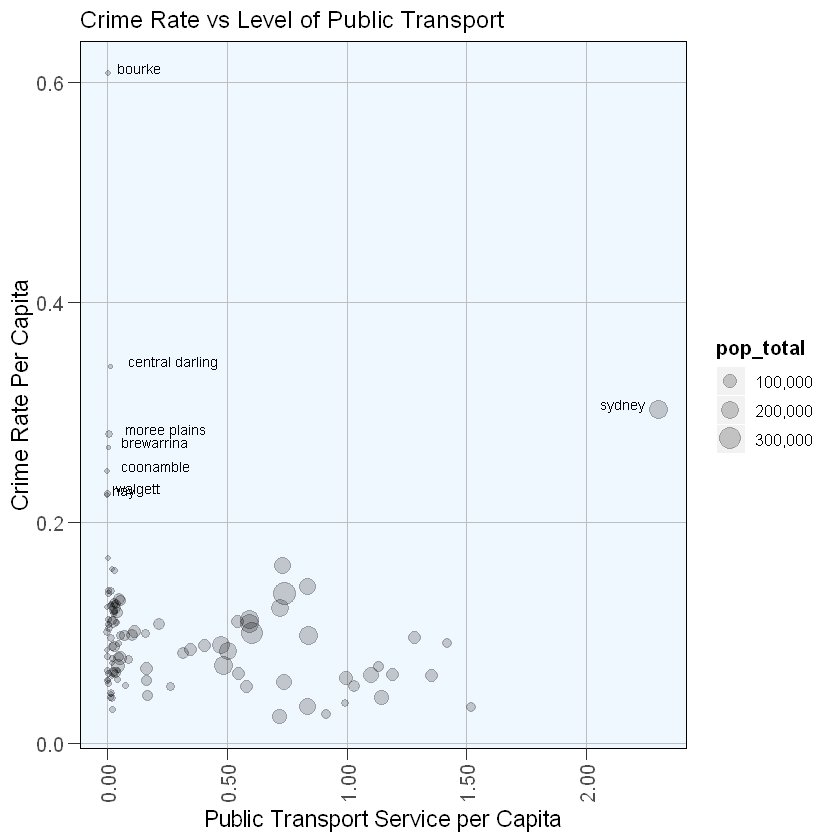

In [49]:
x_var = "service_per_capita"
y_var = "crime_rate_per_lga"
title = "Crime Rate vs Level of Public Transport"

ggplot(data_scatter, aes(!!sym(x_var), !!sym(y_var), size = pop_total)) +
    geom_point(alpha = 0.2) +
    scale_size_continuous(labels = scales::comma) +
    scale_x_continuous(labels = number_format(accuracy = 0.01)) +
    xlab("Public Transport Service per Capita") +
    ylab("Crime Rate Per Capita") +
    # label some points over a certain threshold
    geom_text(aes(label = ifelse(!!sym(x_var) > 2, as.character(LGA), '')), hjust = 1.3, vjust = 0, size = 3) +
    geom_text(aes(label = ifelse((!!sym(y_var) > 0.2) & (!!sym(x_var) < 0.5), as.character(LGA), '')), hjust = -0.2, vjust = 0, size = 3) +
    ggtitle(title) +
    my_theme()

chart_name_svg = paste("scatter_", y_var, "_vs_", x_var, ".svg", sep = "")
chart_name_png = paste("scatter_", y_var, "_vs_", x_var, ".png", sep = "")
filename_svg = paste(char_ouput_path, chart_name_svg, sep = "/")
filename_png = paste(char_ouput_path, chart_name_png, sep = "/")
ggsave(file = filename_svg)
ggsave(file = filename_png)

## `crime_rate_per_lga` vs `age`

In [34]:
col_def = cols(
  LGA = readr::col_factor(),
  Offence = readr::col_factor(),
  Crim_Count = readr::col_integer(),
  crime_tot_per_lga = readr::col_double(),
  Sex = readr::col_factor(),
  Age = readr::col_factor(),
  pop_sex_age = readr::col_double(),
  pop_total = readr::col_double(),
  crime_rate_per_lga = readr::col_double()
)

In [39]:
data_crime_age <- data %>%
    distinct(LGA, Sex, Age, pop_sex_age, pop_total, crime_rate_per_lga) %>%
    drop_na

head(data_crime_age)
glimpse(data_crime_age)

LGA,Sex,Age,pop_sex_age,pop_total,crime_rate_per_lga
albury,Females,95 - 99,78,51081,0.1220219
albury,Males,95 - 99,21,51081,0.1220219
albury,Females,90 - 94,271,51081,0.1220219
albury,Males,90 - 94,117,51081,0.1220219
albury,Females,85 - 89,484,51081,0.1220219
albury,Males,85 - 89,351,51081,0.1220219


Observations: 5,500
Variables: 6
$ LGA                <fct> albury, albury, albury, albury, albury, albury, ...
$ Sex                <fct> Females, Males, Females, Males, Females, Males, ...
$ Age                <fct> 95 - 99, 95 - 99, 90 - 94, 90 - 94, 85 - 89, 85 ...
$ pop_sex_age        <dbl> 78, 21, 271, 117, 484, 351, 734, 501, 924, 746, ...
$ pop_total          <dbl> 51081, 51081, 51081, 51081, 51081, 51081, 51081,...
$ crime_rate_per_lga <dbl> 0.1220219, 0.1220219, 0.1220219, 0.1220219, 0.12...


In [40]:
# Ordering the age group
data_crime_age$Age <- factor(data_crime_age$Age, levels = c("0 - 4","5 - 9","10 -14","15 - 19","20 - 24","25 - 29","30 - 34","35 - 39","40 - 44","45 - 49","50 - 54","55 - 59","60 - 64","65 - 69","70 - 74","75 - 79","80 - 84","85 - 89","90 - 94","95 - 99","100 and over","115 years and over"))

data_crime_age %<>% 
    drop_na

In [41]:
# Function to plot the age distribution in an lga

plot_bar = function(data, lga, x_var, y_var){
    title = paste("Age distribution in ", lga, sep = "")
    
    p <- ggplot(data %>% filter(LGA == !!lga), aes(x = !!sym(x_var), y = !!sym(y_var), fill = Sex)) + 
    geom_bar(stat = "identity", position = "dodge") + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
    scale_y_continuous(labels = scales::comma) +
    ylab("Population") +
    xlab("Age Group") +
    ggtitle(title)
    
    return(p)
}

## `crime_rate` vs `labour`

In [42]:
data <- read_csv(paste(input_path, "joined_crime_labour.csv", sep = "/"))
head(data)
glimpse(data)

Parsed with column specification:
cols(
  X1 = col_double(),
  LGA = col_character(),
  Offence = col_character(),
  Crim_Count = col_double(),
  crime_tot_per_lga = col_double(),
  pop_total = col_double(),
  crime_rate_per_lga = col_double(),
  Age = col_character(),
  Sex = col_character(),
  `Labour force status` = col_character(),
  pop_count = col_double()
)


X1,LGA,Offence,Crim_Count,crime_tot_per_lga,pop_total,crime_rate_per_lga,Age,Sex,Labour force status,pop_count
1,albury,Murder *,2,6233,51081,0.1220219,15 - 19,Males,"Employed, worked full-time",236
1,albury,Murder *,2,6233,51081,0.1220219,15 - 19,Females,"Employed, worked full-time",113
1,albury,Murder *,2,6233,51081,0.1220219,15 - 19,Persons,"Employed, worked full-time",348
1,albury,Murder *,2,6233,51081,0.1220219,15 - 19,Males,"Employed, worked part-time",431
1,albury,Murder *,2,6233,51081,0.1220219,15 - 19,Females,"Employed, worked part-time",641
1,albury,Murder *,2,6233,51081,0.1220219,15 - 19,Persons,"Employed, worked part-time",1074


Observations: 2,511,310
Variables: 11
$ X1                    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ LGA                   <chr> "albury", "albury", "albury", "albury", "albu...
$ Offence               <chr> "Murder *", "Murder *", "Murder *", "Murder *...
$ Crim_Count            <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...
$ crime_tot_per_lga     <dbl> 6233, 6233, 6233, 6233, 6233, 6233, 6233, 623...
$ pop_total             <dbl> 51081, 51081, 51081, 51081, 51081, 51081, 510...
$ crime_rate_per_lga    <dbl> 0.1220219, 0.1220219, 0.1220219, 0.1220219, 0...
$ Age                   <chr> "15 - 19", "15 - 19", "15 - 19", "15 - 19", "...
$ Sex                   <chr> "Males", "Females", "Persons", "Males", "Fema...
$ `Labour force status` <chr> "Employed, worked full-time", "Employed, work...
$ pop_count             <dbl> 236, 113, 348, 431, 641, 1074, 27, 26, 59, 22...


In [44]:
data_crime_labour <- data %>%
    distinct(LGA, pop_total, crime_rate_per_lga, Age, Sex, `Labour force status`, pop_count) %>%
    filter(Sex != "Persons") %>%
    mutate(employment_status = ifelse(grepl("Employed", `Labour force status`), "employed", "unemployed")) %>%
    group_by(LGA, employment_status) %>%
    summarise(num_employed = sum(pop_count), pop_total = mean(pop_total), crime_rate_per_lga = mean(crime_rate_per_lga)) %>%
    filter(employment_status == "employed") %>%
    mutate(employed_percentage = num_employed / pop_total)

head(data_crime_labour)
glimpse(data_crime_labour)

LGA,employment_status,num_employed,pop_total,crime_rate_per_lga,employed_percentage
albury,employed,45818,51081,0.12202189,0.8969676
armidale regional,employed,24620,29429,0.13687179,0.8365898
ballina,employed,34944,41774,0.06439412,0.8365012
balranald,employed,1979,2292,0.08376963,0.8634380
bathurst regional,employed,36334,41297,0.09751314,0.8798218
bega valley,employed,26343,33229,0.06376960,0.7927714


Observations: 125
Variables: 6
Groups: LGA [125]
$ LGA                 <chr> "albury", "armidale regional", "ballina", "balr...
$ employment_status   <chr> "employed", "employed", "employed", "employed",...
$ num_employed        <dbl> 45818, 24620, 34944, 1979, 36334, 26343, 9774, ...
$ pop_total           <dbl> 51081, 29429, 41774, 2292, 41297, 33229, 12656,...
$ crime_rate_per_lga  <dbl> 0.12202189, 0.13687179, 0.06439412, 0.08376963,...
$ employed_percentage <dbl> 0.8969676, 0.8365898, 0.8365012, 0.8634380, 0.8...


Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


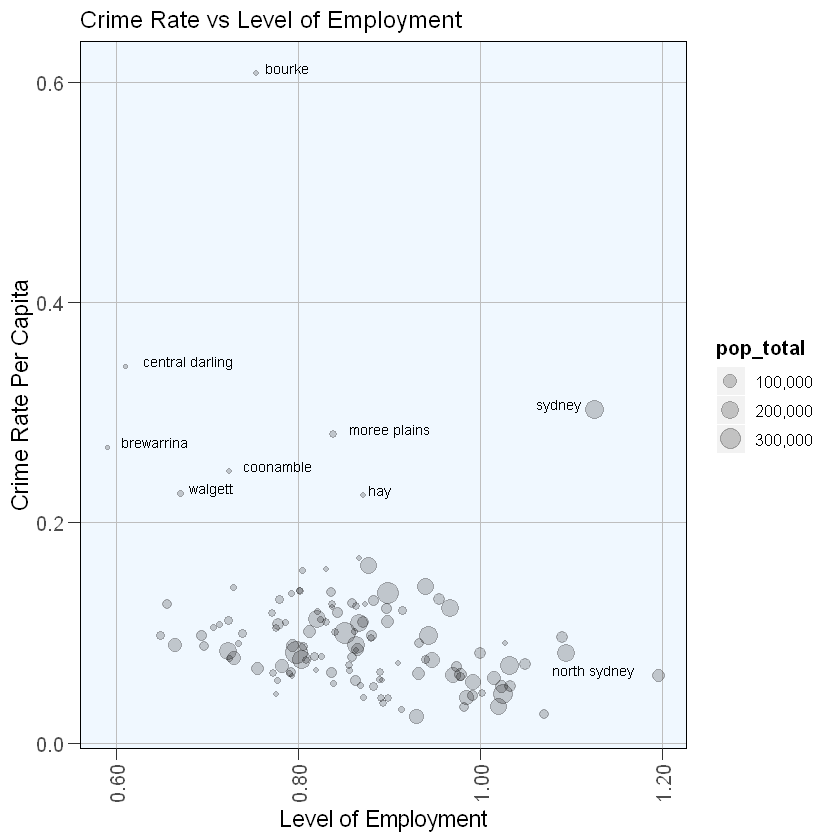

In [50]:
x_var = "employed_percentage"
y_var = "crime_rate_per_lga"
title = "Crime Rate vs Level of Employment"

ggplot(data_crime_labour, aes(!!sym(x_var), !!sym(y_var), size = pop_total)) +
    geom_point(alpha = 0.2) +
    scale_size_continuous(labels = scales::comma) +
    scale_x_continuous(labels = number_format(accuracy = 0.01)) +
    xlab("Level of Employment") +
    ylab("Crime Rate Per Capita") +
    # label some points over a certain threshold
    geom_text(aes(label = ifelse((!!sym(x_var) > 1.1) & (!!sym(y_var) > 0), as.character(LGA), '')), hjust = 1.3, vjust = 0, size = 3) +
    geom_text(aes(label = ifelse((!!sym(x_var) < 1) & (!!sym(y_var) > 0.2), as.character(LGA), '')), hjust = -0.2, vjust = 0, size = 3) +
    ggtitle(title) +
    my_theme()

chart_name_svg = paste("scatter_", y_var, "_vs_", x_var, ".svg", sep = "")
chart_name_png = paste("scatter_", y_var, "_vs_", x_var, ".png", sep = "")
filename_svg = paste(char_ouput_path, chart_name_svg, sep = "/")
filename_png = paste(char_ouput_path, chart_name_png, sep = "/")
ggsave(file = filename_svg)
ggsave(file = filename_png)

# Correlations

In [14]:
head(data_scatter)

LGA,crime_rate_per_lga,Pop_Dens_km2,seifa_value,num_service,pop_total
albury,0.12202189,170.5,964,1769,51081
ballina,0.06439412,88.7,986,1353,41774
balranald,0.08376963,0.1,969,4,2292
bathurst regional,0.09751314,11.1,994,2882,41297
bega valley,0.06376960,5.4,974,771,33229
bellingen,0.06305310,8.1,957,422,12656
